# Cursos de Introdução a classificação com SKLearn

## Aula 05

### Importando as Bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

### Importando os datasets

In [2]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(url, index_col=0)

### Explorando os dados

In [3]:
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [4]:
df.shape

(10000, 4)

In [5]:
mapa = {'yes': 1, 'no': 0}

df['sold'] = df['sold'].map(mapa)
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [6]:
ano = 2018
df['model_age'] = ano - df['model_year']
df.head()

,mileage_per_year,model_year,price,sold,model_age
0,21801,2000,30941.02,1,18
1,7843,1998,40557.96,1,20
2,7109,2006,89627.50,0,12
3,26823,2015,95276.14,0,3
4,7935,2014,117384.68,1,4


In [7]:
fator_de_conversao_milha = 1.60934
df['km_per_year'] = df['mileage_per_year'] * fator_de_conversao_milha
df.head()

,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,21801,2000,30941.02,1,18,35085.22134
1,7843,1998,40557.96,1,20,12622.05362
2,7109,2006,89627.50,0,12,11440.79806
3,26823,2015,95276.14,0,3,43167.32682
4,7935,2014,117384.68,1,4,12770.11290


In [8]:
df = df.drop(columns=['mileage_per_year', 'model_year'])
df.head()

,price,sold,model_age,km_per_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [9]:
X = df[['model_age', 'km_per_year', 'price']]
y = df['sold']

seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.25)

modelo = LinearSVC(random_state=seed)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurancia do modelo é: {acuracia:0.2%}')

A acurancia do modelo é: 58.00%


C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Utilizando um classe dummy para criar um modelo que sirva de baseline

In [10]:
dummy_stratified = DummyClassifier(random_state=seed)
dummy_stratified.fit(X_train, y_train)
accuracy = dummy_stratified.score(X_test, y_test)

print(f'A acurácia do dummy stratified foi {accuracy:0.2%}')

A acurácia do dummy stratified foi 58.00%


In [11]:
dummy_mostfrequent = DummyClassifier(strategy='most_frequent', random_state=seed)
dummy_mostfrequent.fit(X_train, y_train)
accuracy = dummy_mostfrequent.score(X_test, y_test)

print(f'A acurácia do dummy most frequent foi {accuracy:0.2%}')

A acurácia do dummy most frequent foi 58.00%


In [12]:
seed = 20
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)


modelo = SVC(random_state=20)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurancia do modelo é: {acuracia:0.2%}')

A acurancia do modelo é: 75.92%


## Utilizando um estimador do tipo árvore de decisão

In [29]:
seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.25)

modelo = DecisionTreeClassifier(random_state=20, max_depth=3)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurancia do modelo é: {acuracia:0.2%}')

A acurancia do modelo é: 78.40%


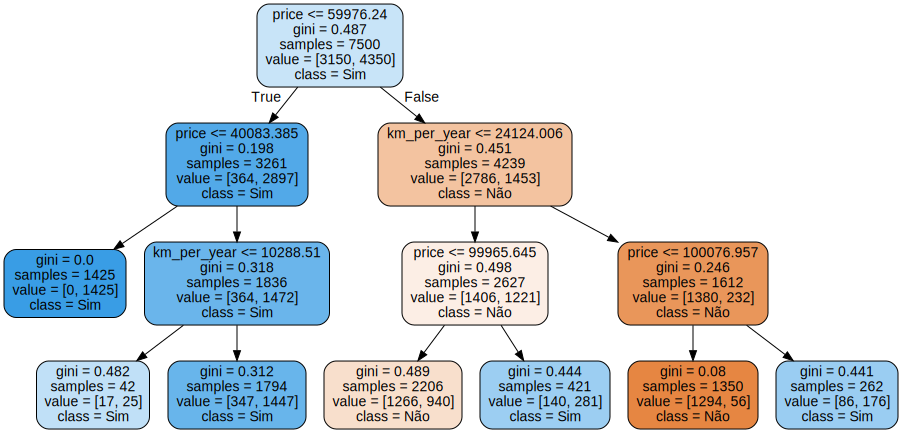

In [30]:
features = X.columns
dot_data = export_graphviz(modelo, feature_names=features, class_names=['Não', 'Sim'],
                           filled=True, rounded=True)
graphviz.Source(dot_data)